# Exploring dataset with Pandas

In [35]:
import numpy as np
import pandas as pd

In [36]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                   sheet_name = 'Canada by Citizenship',
                   skiprows = range(20),
                   skipfooter=2)

print('Data read into a pandas dataframe')

Data read into a pandas dataframe


In [37]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_can = df_can.drop(columns={'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
                    'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
                    'Unnamed: 49', 'Unnamed: 50'})

In [39]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [40]:
df_can.shape

(195, 43)

In [41]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [42]:
df_can.rename(columns = {'OdName' : 'Country',
                        'AreaName' : 'Continent',
                        'RegName' : 'Region'},
             inplace= True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [43]:
df_can['Total'] = df_can.sum(axis=1)

In [44]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

## Pandas : Indexing and Selection (slicing)

In [45]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [46]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [47]:
df_can.set_index('Country', inplace=True)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [62]:
df_can.columns = list(map(str, df_can.columns))

In [63]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data Using Matplotlib

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [75]:
mpl.style.use(['ggplot'])

## Line Plots

In [76]:
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

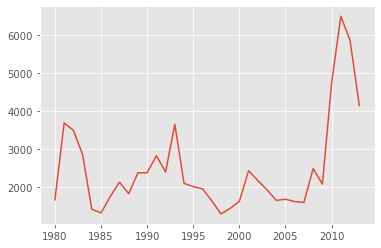

In [77]:
haiti.plot()

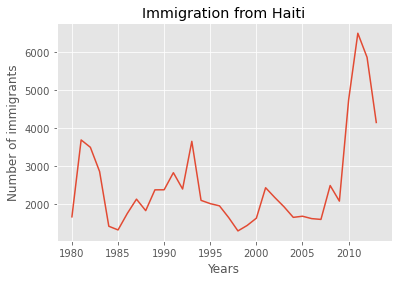

In [78]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

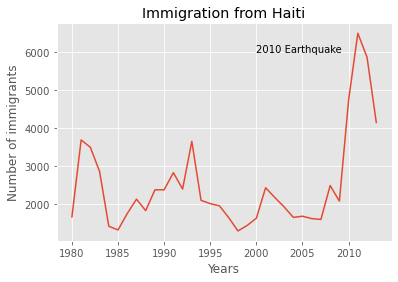

In [79]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000,6000, '2010 Earthquake')

plt.show()

In [80]:
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [82]:
df_CI = China_India.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


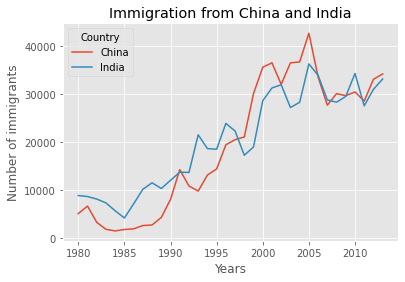

In [83]:
df_CI.plot(kind='line')
plt.title('Immigration from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

## Area Plots

In [84]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head()

df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


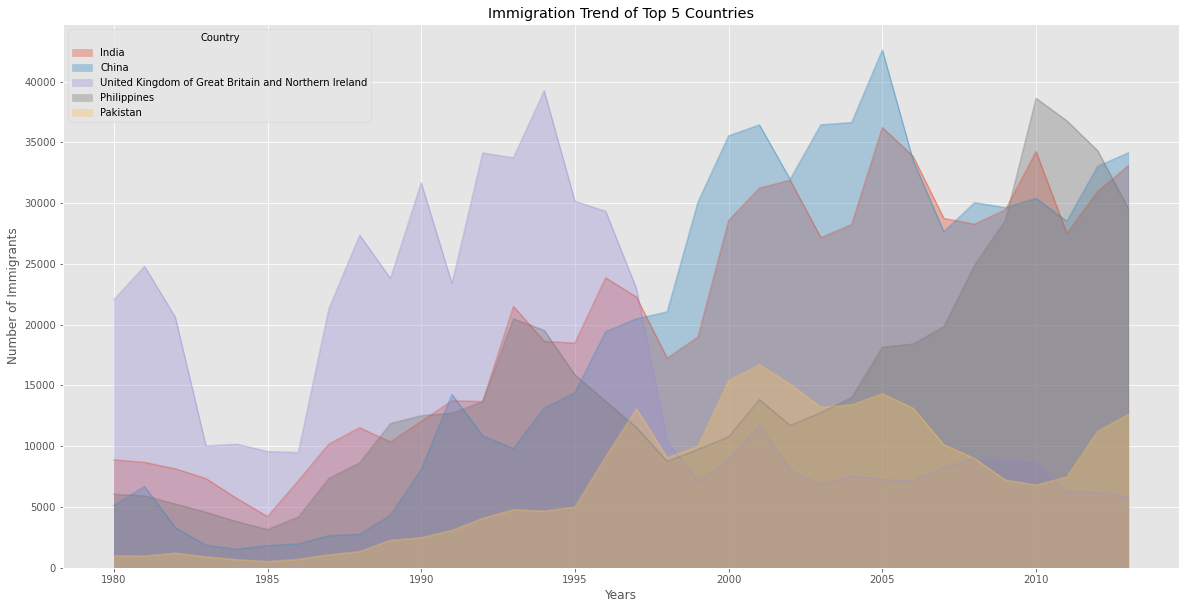

In [87]:
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area', alpha=0.35,
             stacked = False, figsize=(20,10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

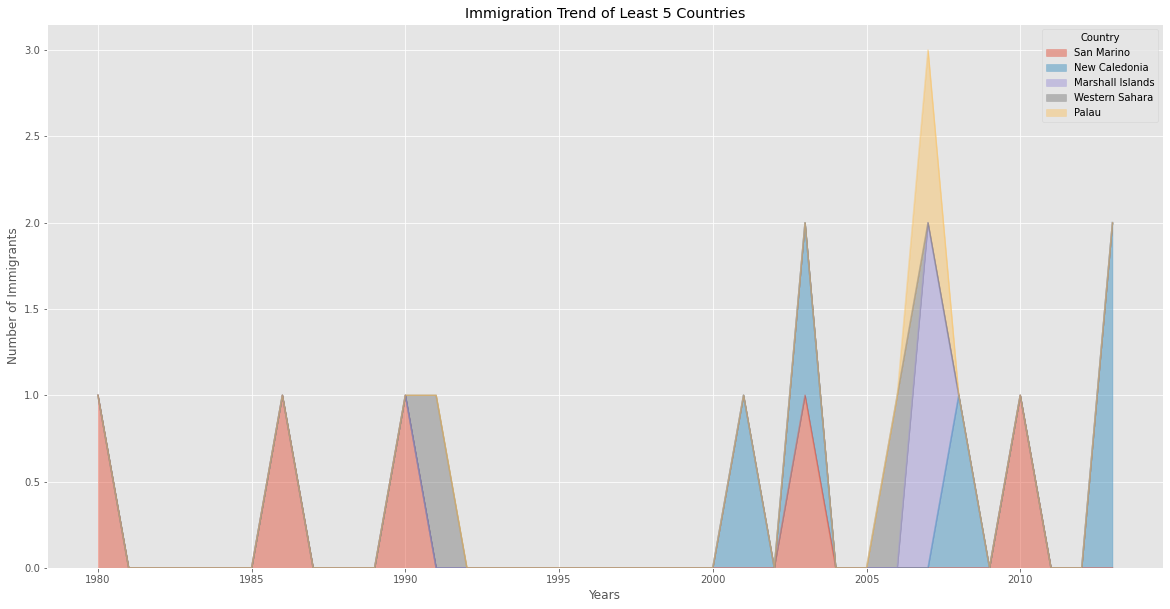

In [88]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.plot(kind='area', alpha=0.45,
              stacked = True, figsize=(20,10))

plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Histogram

In [89]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [90]:
count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


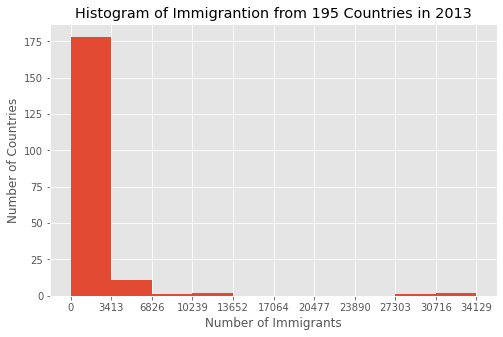

In [92]:
df_can['2013'].plot(kind='hist', figsize=(8,5), xticks = bin_edges)

plt.title('Histogram of Immigrantion from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

In [93]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


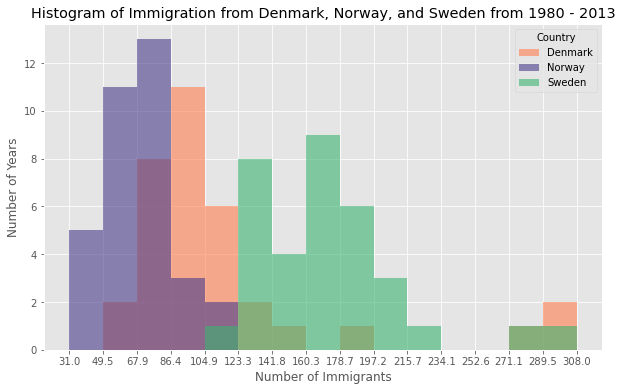

In [95]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind='hist', figsize=(10,6), bins=15, alpha=0.6,
         xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Charts

In [96]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

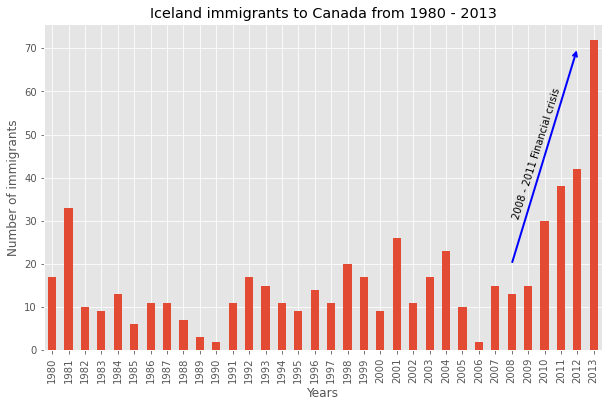

In [98]:
df_iceland.plot(kind='bar', figsize=(10,6), rot=90)

plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Iceland immigrants to Canada from 1980 - 2013')

plt.annotate("", xy=(32,70),
            xytext = (28,20), xycoords='data',
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc3',
                           color='blue', lw=2))

plt.annotate('2008 - 2011 Financial crisis',
            xy=(28,30), rotation=72.5,
            va='bottom', ha = 'left')
plt.show()

In [99]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

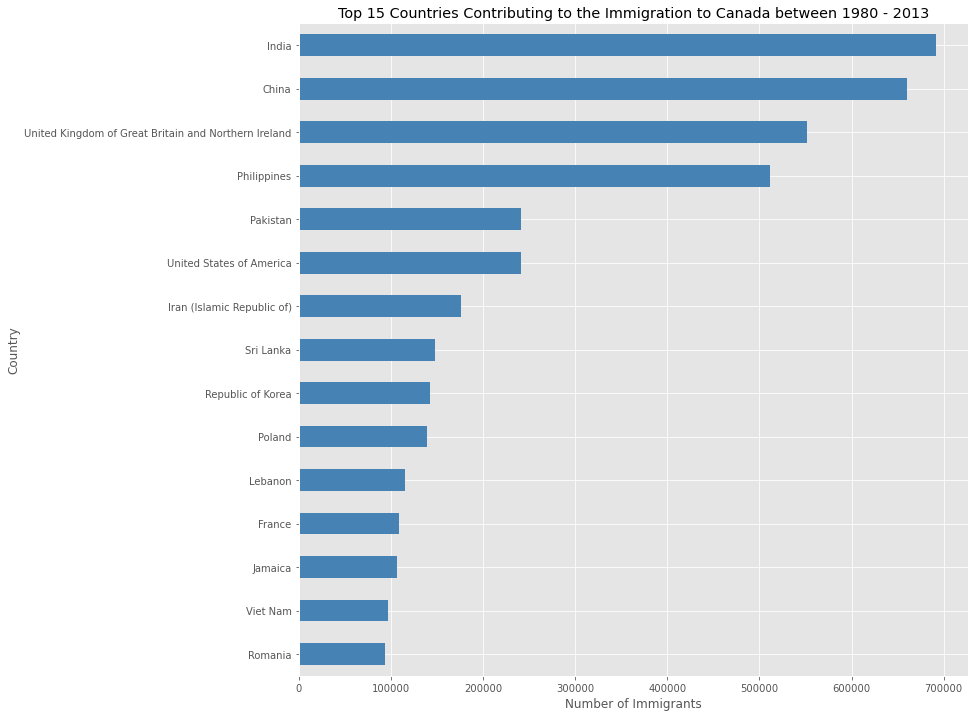

In [100]:
df_top15.plot(kind='barh', figsize=(12,12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')

plt.show()

## Pie Charts

In [102]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


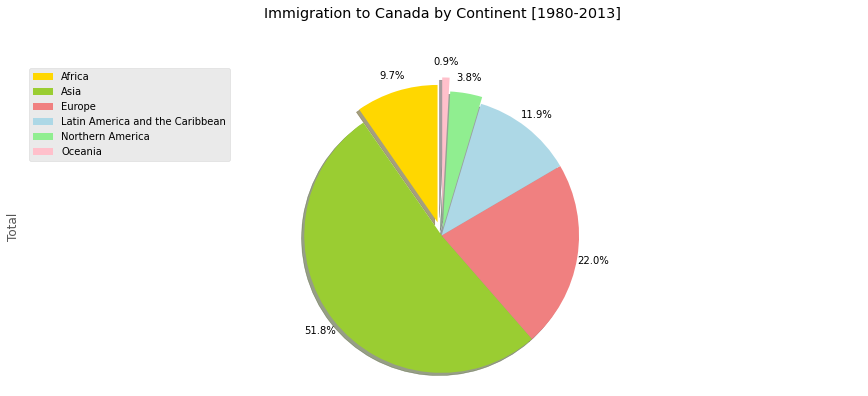

In [111]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightblue',
             'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.05, 0.15]

df_continents['Total'].plot(kind='pie', figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=colors_list,
                           explode=explode_list)

plt.title('Immigration to Canada by Continent [1980-2013]', y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

## Box Plots

In [112]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


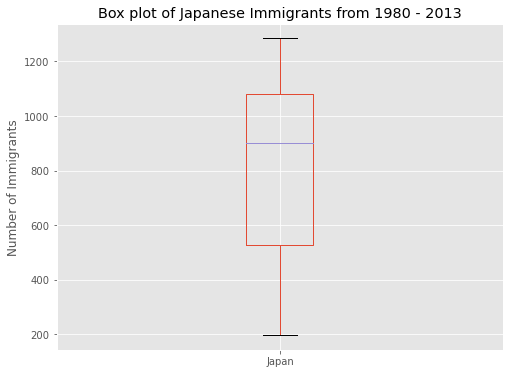

In [113]:
df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [115]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [116]:
df_CI = df_can.loc[(['China', 'India']), years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [117]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


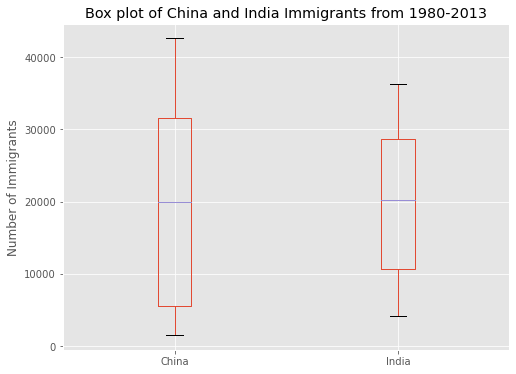

In [118]:
df_CI.plot(kind='box', figsize=(8,6))

plt.title('Box plot of China and India Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

### SubPlots

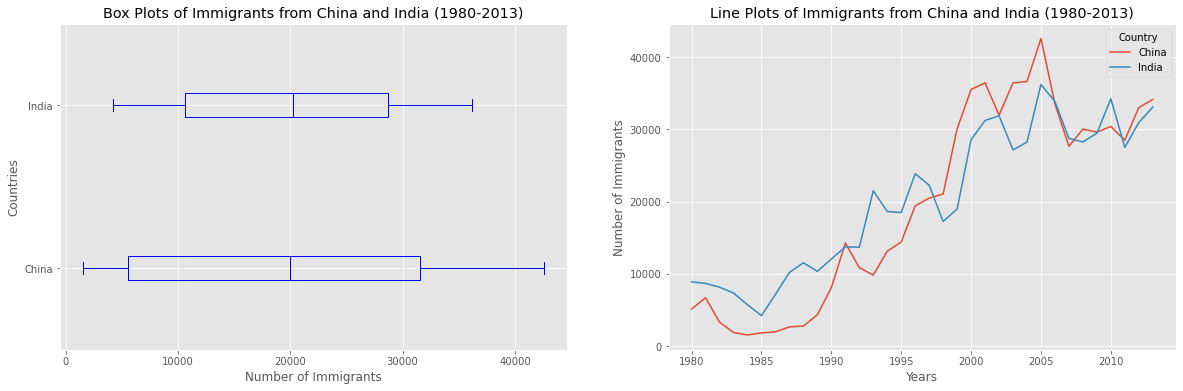

In [119]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# subplot 1 : Box Plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20,6),
          ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980-2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# subplot 2 : Line Plot
df_CI.plot(kind='line', figsize=(20,6), ax=ax1)
ax1.set_title('Line Plots of Immigrants from China and India (1980-2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Scatter Plots

In [120]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


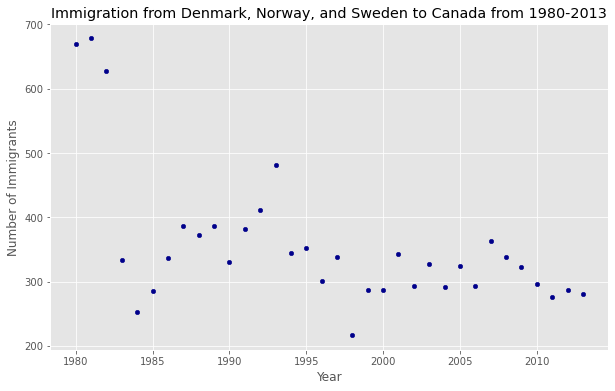

In [122]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10,6),
             color='darkblue')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

## Bubble Plots

In [123]:
df_can_t = df_can[years].transpose()

df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [125]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

    
# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) /(df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

In [ ]:
# Brazil
ax0 = df_can_t.plot(kind='scatter', x='Year', y='Brazil',
                   figsize=(14,8), alpha=0.5, color='green',
                   s=norm_brazil * 2000 + 10,
                   xlim=(1975,2015))

# Argentina
ax1 = df_can_t.plot(kind='scatter', x='Year', y='Argentina',
                   alpha=0.5, color='blue',
                   s=norm_argentina * 2000 + 10,
                   ax=ax0
                   )

ax0.set_ylabel